In [ ]:
import pandas as pd
import os
import numpy as np
import math
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Bidirectional, Dropout, LSTM, TimeDistributed, Flatten, RepeatVector, BatchNormalization,Conv2D,GlobalAveragePooling2D,GlobalAveragePooling2D, LeakyReLU, AveragePooling2D,MaxPooling2D,SpatialDropout2D, Reshape
from keras.regularizers import l2
from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.optimizers import Adam



### Load and Process Data 

In [ ]:
# Connect to your Google Drive here
#
from google.colab import drive
drive.mount('/content/drive')


# Set the folder to point to where you downloaded the ESC dataset,
# and also the folder to point to where you intend to save the processed data
#
user_folder = '/content/drive/My Drive/ColabNotebooks/ITI110'

Mounted at /content/drive


In [ ]:
#df=pd.read_csv('data_normalized.csv', index_col=False)
#df=pd.read_csv('data_augmented.csv', index_col=False)

df=pd.read_csv(user_folder +'/'+'data_augmented.csv', index_col=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,"[0.0, 0.0, 0.0, 0.0, 0.0002448784087915845, 0....","[0.17522129060731412, 0.2874729202431497, 0.0,...","[0.275779359207068, 0.26508140219964754, 0.0, ...","[0.2387925360778001, 0.3069714788637996, 0.0, ...","[0.20456744185837544, 0.30737914614479034, 0.0...","[0.24075421008753317, 0.35584099533804675, 0.0...","[0.25804888554524974, 0.31737329156146776, 0.0...","[0.17495590964359647, 0.2840891447979197, 0.0,...","[0.18076530371415564, 0.2767317541279658, 0.0,...","[0.20757447598040882, 0.28529764968514537, 0.0...","[0.2091182091145263, 0.30232406318830424, 0.0,...","[0.20010743464535025, 0.3298441852673377, 0.0,...","[0.21003737353317106, 0.3333837528591532, 0.0,...","[0.18854283561937127, 0.3064399035053147, 0.0,...","[0.1976422390846095, 0.34858295097922326, 0.0,...","[0.19934305760031792, 0.3278063230091262, 0.0,...","[0.19902218989551468, 0.3322032603021786, 0.0,...","[0.20018250715711758, 0.34316353455236803, 0.0...","[0.26038127720284104, 0.4232156687114082, 0.0,...","[0.27374810853647796, 0.3448762064162408, 0.0,...","[0.24733388351782823, 0.35316343893021707, 0.0...","[0.26387366023831255, 0.3669857277028243, 0.0,...","[0.2776930081004963, 0.33324635588744056, 0.0,...","[0.2492370334608279, 0.2941678728030825, 0.0, ...","[0.26911560583818733, 0.31380696604704733, 0.0...","[0.18519499920824312, 0.29302725548902425, 0.0...","[0.2354231687682618, 0.32608384131184087, 0.0,...","[0.2136604840336812, 0.3321463639378755, 0.0, ...","[0.2042403427475535, 0.3015386834501918, 0.0, ...","[0.22190930430560915, 0.2994399926689259, 0.0,...","[0.2464906595879739, 0.29182635343214014, 0.0,...","[0.2885980837410643, 0.2880883032159185, 0.0, ...","[50.926000000000045, 48.98800000000003, 0.0, 0...","[0.2627569603251295, 0.2632941308460845, 0.0, ...","[0.284142992599211, 0.24185011813109605, 0.0, ...","[0.24701302782674023, 0.32132327751772116, 0.0...","[0.24638835827805955, 0.28910689338446144, 0.0...","[0.30834423960710555, 0.28542341527901877, 0.0...","[0.26640699192961853, 0.28869674492562164, 0.0...","[0.26632188859231626, 0.27645178388849134, 0.0...",...,"[0.27970034949713257, 0.23506245698554942, 0.0...","[0.28919639688219234, 0.2465330947788163, 0.0,...","[0.28088683887841037, 0.23807794115973815, 0.0...","[0.25846902264532406, 0.25819463939410875, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.10381426449510446, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.09852515127200821, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.11071956599202543, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.09070648604143422, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.07684766337453774, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.04806560399794436, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.022558568811792093, -0....","[0.0, 0.0, 0.0, 0.0, 3.8899999999998727, -13.6...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, ...","[0.0, 0, 0.0, 

In [ ]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94'],
      dtype='object')

In [ ]:
max_frames_to_use=60

df.drop(df.iloc[:,max_frames_to_use:], inplace=True, axis=1)

In [ ]:
import ast

#infilepath='data_resized.csv'


def load_x(data):
   
    #print ("Processing " + infilepath)
    x = []
    
    for row in tqdm(data.itertuples(index=False)):

        # TODO:
        # Load each row from the CSV file and call the 
        # process_joints function.
        #...#
        x_row=[]
        for i in row:       
            #print(ast.literal_eval(i))
            x_row.append(ast.literal_eval(i))
        
        x.append(x_row)
    x = np.array(x)
    print(x.shape)
   # x = np.reshape(x,(x.shape(0), 60, 36)) #each video has 32 frames
    
    print ("Done.")
    return x

x=load_x(df)

792it [00:04, 168.01it/s]

(792, 60, 36)
Done.


In [ ]:
x.shape

(792, 60, 36)

In [ ]:
# #to create row and columns dimensions for use in. convLstm2d model later.
# import ast

# #infilepath='data_resized.csv'


# def load_x2(data):
#     #d = []
#     #print ("Processing " + infilepath)
#     x = []
#     #y = []
    
#     for row in tqdm(data.itertuples(index=False)):

#         # TODO:
#         # Load each row from the CSV file and call the 
#         # process_joints function.
#         #...#
#         x_row=[]
#         #y_row=[]
#         for i in row:       
#             #print(ast.literal_eval(i))
#             #x_row.append(ast.literal_eval(i))
#             lst=ast.literal_eval(i)

#             x_coordinates=lst[0::2]
#             #x_row.append(x_coordinates)

#             y_coordinates=lst[1::2]
#             #y_row.append(y_coordinates)
#             x_row.append([tuple(a) for a in zip(x_coordinates,y_coordinates)])
#             #x_row.append(zip(x_coordinates,y_coordinates))
        
#         x.append(x_row)
#         #y.append(y_row)
#     #d.append(x)
#     #d.append(y)
#     x = np.array(x)
#     # y = np.array(y)
#     #d= np.array(d)

#     print(x.shape)
#    # x = np.reshape(x,(x.shape(0), 60, 36)) #each video has 32 frames
    
#     print ("Done.")
#     return x

# x=load_x2(df)

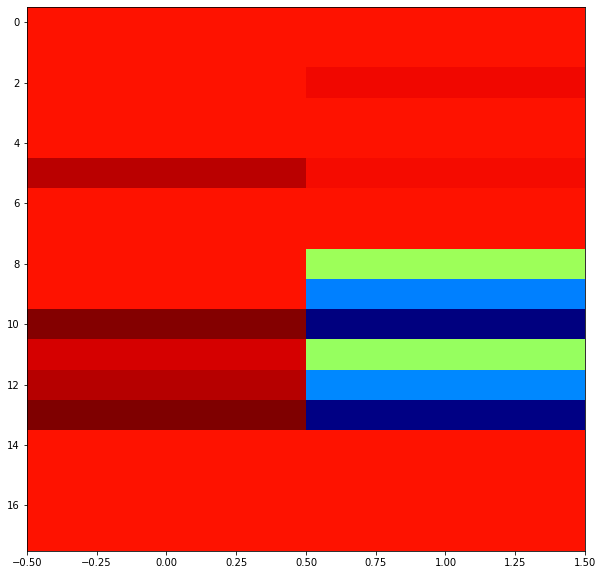

In [ ]:
import PIL
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(x[0][0],cmap=plt.cm.jet, aspect='auto')


y=pd.read_csv('PersonLabel.csv',index_col=False)

In [ ]:
#personlabel='PersonLabel.csv'
#personlabel='PersonLabel_augmented.csv'
personlabel=user_folder+'/'+'PersonLabel_augmented.csv'
import ast
def load_y(personlabel):
    df = pd.read_csv(personlabel)
    
    #print ("Processing " + personlabel)
    
    y = []
    index = 0
    for row in tqdm(df.itertuples(index=False)):
        for i in row:
          #print(ast.literal_eval(i))
          y.append(ast.literal_eval(i))
                    
    y = np.array(y)  
    return y

y=load_y(personlabel)
y.shape

792it [00:00, 14395.24it/s]


(792, 44)

In [ ]:
# y=np.array(y)
# y.shape

(792, 44)

y=pd.read_csv('Label.csv')

from tensorflow.keras.utils import to_categorical 

y = to_categorical(y)


#y=np.array(y)
#y.dtype

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify =y)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(633, 60, 36) (633, 44) (159, 60, 36) (159, 44)


In [ ]:
len(y_train[0])

44

In [ ]:
labels=np.unique(y, axis=0)

### Create Model

In [ ]:
#from tensorflow.keras.layers import PReLU
from tensorflow.keras import optimizers, regularizers
from keras.utils.vis_utils import plot_model

# Create our LSTM model here
#
l2_rate=0.1   #0.1
dropout_rate=0.3    #0.15
dropout_rate1=0.2
dropout_rate2=0.25

def create_model():


    model = Sequential()


    model.add(Bidirectional(LSTM(512,return_sequences=True),input_shape=(95,36 ))) 
    model.add(BatchNormalization(renorm=True))

    model.add(TimeDistributed(Dense(512,activation='elu')))


    model.add(Bidirectional(LSTM(512,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul')) 
    model.add(BatchNormalization(renorm=True))

    model.add(TimeDistributed(Dense(512,activation='elu'))) #TimeDistributedDense applies a same Dense (fully-connected) operation to every timestep of a 3D tensor.

    model.add(Bidirectional(LSTM(512,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul')) 
    model.add(BatchNormalization(renorm=True))

    model.add(TimeDistributed(Dense(512,activation='elu')))
    
    model.add(Bidirectional(LSTM(512,return_sequences=False,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    model.add(BatchNormalization(renorm=True))


    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='elu',kernel_regularizer=regularizers.l1_l2(l1=0,l2=0.1)))
                                          # bias_regularizer=regularizers.l2(0.01),
                                          # activity_regularizer=regularizers.l2(0.01)))
    #model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(Dropout(0.3))
    model.add(Dense(512, activation='elu',kernel_regularizer=regularizers.l1_l2(l1=0,l2=0.001)))
                                          # bias_regularizer=regularizers.l2(0.01),
                                          # activity_regularizer=regularizers.l2(0.01)))
    #model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(44, activation='softmax'))
 
    adm=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False) 

    model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])

    model.summary(line_length=150)
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    
    
    return model

    #model.add(TimeDistributed(Dense(256,activation='elu')))
    
    #model.add(TimeDistributed(Bidirectional(LSTM(500,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul')))
    #model.add(BatchNormalization(renorm=True))
    #model.add(Dropout(dropout_rate))
 

    # model.add(RepeatVector(500))
    # model.add(Bidirectional(LSTM(128,return_sequences=False,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization(renorm=True))
    # model.add(RepeatVector(500))
    #model.add(Dropout(dropout_rate))
    # model.add(Bidirectional(LSTM(512,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization(renorm=True))
    #model.add(Dropout(dropout_rate))
    #model.add(Dropout(dropout_rate2))

    #model.add(TimeDistributed(Flatten()))
    # model.add(Bidirectional(LSTM(512,return_sequences=False,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization(renorm=True))
    # # #model.add(RepeatVector(5))
    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate))
    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='ave'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate1))
    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate2))

    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate))
    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='ave'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate1))
    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate2))


    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate))
    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='ave'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate1))
    # model.add(Bidirectional(LSTM(64,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
    # model.add(BatchNormalization())
    # model.add(Dropout(dropout_rate2))

    #model.add(RepeatVector(5))
    # model.add(LSTM(512,kernel_regularizer=l2(l2_rate),return_sequences=True))
    # model.add(BatchNormalization())
    # model.add(LSTM(512,kernel_regularizer=l2(l2_rate)))
    # model.add(BatchNormalization())

    # model.add(RepeatVector(5))

    #model.add(Dropout(0.1))
    #model.add(Flatten())  
 
    
    # One or more repetitions of Dense layers
    # model.add(Dense(64, activation='elu'))
    # model.add(BatchNormalization())
    # model.add(Dropout(0.8))
    # model.add(Dense(128, activation='elu'))
    # model.add(BatchNormalization())
    

    # model.add(Dropout(0.3))
    
    # model.add(Dense(512, activation='elu',kernel_regularizer=regularizers.l1_l2(l1=0,l2=0.2)))
    #                                       # bias_regularizer=regularizers.l2(0.01),
    #                                       # activity_regularizer=regularizers.l2(0.01)))
    # #model.add(Dropout(0.5))
    # model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    # #model.add(Dropout(0.3))
    # model.add(Dense(512, activation='elu',kernel_regularizer=regularizers.l1_l2(l1=0,l2=0.2)))
    #                                       # bias_regularizer=regularizers.l2(0.01),
    #                                       # activity_regularizer=regularizers.l2(0.01)))
    # #model.add(Dropout(0.5))
    # model.add(BatchNormalization())

    # model.add(Dense(44, activation='softmax'))
 
    # adm=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False) 

    # model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])

    # model.summary(line_length=150)
    
    
    
    # return model



# Create our model
#
model = create_model()


# Create the training folder
#
# training_session_id = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
# training_session_folder = 'train_%s' % (training_session_id)
# os.makedirs(training_session_folder, exist_ok=True)

# Configure the checkpoint and stop point.
# This allows the training to save the best models and also stop the
# training early if it detects that there are no improvements after
# a long time.
#
# callbacks_list = [
#     keras.callbacks.ModelCheckpoint(
#         filepath=training_session_folder + '/model.{epoch:04d}-val_acc-{val_accuracy:4.2f}-loss-{val_loss:4.2f}.h5',
#         monitor='val_loss', save_best_only=True),
#     keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
# ]

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=300, restore_best_weights=True)
]


# Train our model
#
history = model.fit(x=X_train, y=y_train, batch_size=100, epochs=5000, verbose=1, callbacks=callbacks_list, validation_data=(X_test, y_test))

Model: "sequential_1"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
bidirectional_4 (Bidirectional)                                    (None, 95, 1024)                                            2248704                
______________________________________________________________________________________________________________________________________________________
batch_normalization_6 (BatchNormalization)                         (None, 95, 1024)                                            7168                   
______________________________________________________________________________________________________________________________________________________
time_distributed_3 (TimeDistributed)                               (None

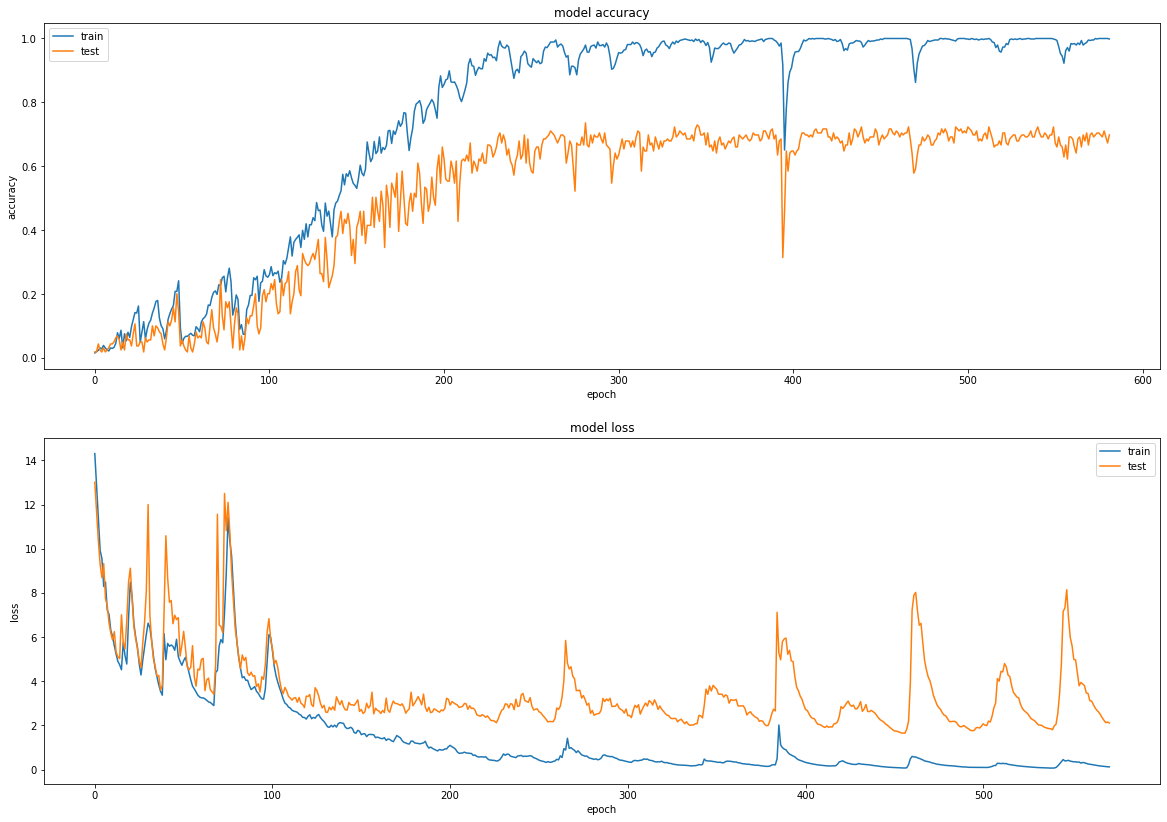

In [ ]:
import matplotlib.pyplot as plt

# This function is used to display the history the train/test accuracy/loss
# of the Keras training.
#
#   history - Pass in the history returned from the model.fit(...) method.
#
def display_training_loss_and_accuracy(history):
    
    plt.figure(figsize=(20,14))
    
    # summarize history for accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'][10:])  #avoid plotting the first 10 epoch due to large values.
    plt.plot(history.history['val_loss'][10:])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()    

display_training_loss_and_accuracy(history)

(633, 95, 36)
[43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20
 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


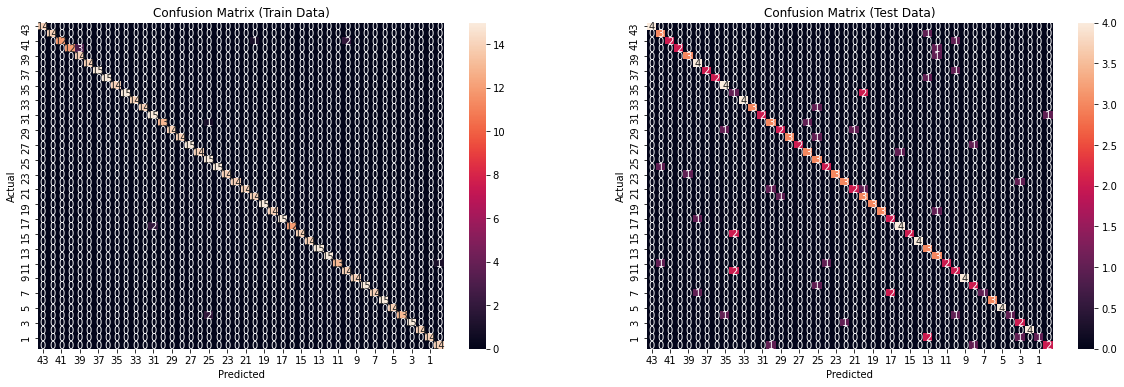

Train Data:
--------------------------------------------------------
              precision    recall  f1-score   support

          43       1.00      1.00      1.00        14
          42       1.00      1.00      1.00        14
          41       1.00      0.80      0.89        15
          40       1.00      0.80      0.89        15
          39       0.82      1.00      0.90        14
          38       1.00      1.00      1.00        14
          37       1.00      1.00      1.00        15
          36       1.00      1.00      1.00        15
          35       1.00      1.00      1.00        14
          34       1.00      1.00      1.00        15
          33       1.00      1.00      1.00        14
          32       1.00      1.00      1.00        14
          31       0.88      1.00      0.94        15
          30       1.00      0.93      0.96        14
          29       1.00      1.00      1.00        14
          28       1.00      1.00      1.00        14
          27

In [ ]:
#------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
 
def display_classification_confusion_matrix(keras_model, x_train, y_train, x_test, y_test, labels):
    
    '''
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    '''
    pred_y_train = []
    pred_y_test = []

    print (x_train.shape)
    pred_y_train = keras_model.predict(x_train)

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    pred_y_train = np.array(pred_y_train)

    pred_y_test = keras_model.predict(x_test)
    #print(pred_y_test)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    pred_y_test = np.array(pred_y_test)

    #test_generator.on_epoch_end()

    plt.figure(figsize=(20,6))  

    labels = np.array(labels).argmax(axis=1)
    print(labels,np.unique(labels))

    # Convert the target labels into the categorical index
    #
    y_train_index = y_train.argmax(axis=1)
    #print(y_train_index)
    pred_y_train_index = pred_y_train.argmax(axis=1)
    y_test_index = y_test.argmax(axis=1)
    pred_y_test_index = pred_y_test.argmax(axis=1)
    #print(pred_y_test_index)
    
    # Print the first Confusion Matrix for the training data
    #
    cm = confusion_matrix(y_train_index, pred_y_train_index)
    #print(cm)
    #print(labels)
    cm_df = pd.DataFrame(cm, labels, labels)
    #print(cm_df)          
    plt.subplot(1, 2, 1)
    plt.title('Confusion Matrix (Train Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    
    # Print the second Confusion Matrix for the test data
    #    
    cm = confusion_matrix(y_test_index, pred_y_test_index)
    
    cm_df = pd.DataFrame(cm, labels, labels)          
    plt.subplot(1, 2, 2)
    plt.title('Confusion Matrix (Test Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    
    plt.show()
    #need to convert target names in classification report to string as the class numbers are integer. 
    #Confusing as to whether its integer or string.
    target_names=list(map(str,labels))

    # Finally display the classification reports
    #
    print ("Train Data:")
    print ("--------------------------------------------------------")
    print(classification_report(y_train_index, pred_y_train_index, target_names=target_names))
    print ("")
    print ("Test Data:")
    print ("--------------------------------------------------------")
    print(classification_report(y_test_index, pred_y_test_index, target_names=target_names))
    

#Exclude the O tags from the confusion matrix.

display_classification_confusion_matrix(model, X_train, y_train, X_test, y_test, labels)

#### Reshape the data for input to ConvLSTM

In [ ]:
X_train, X_test, y_train, y_test

(array([[[-2.70267967e-01,  2.70021121e-01,  0.00000000e+00, ...,
           0.00000000e+00, -1.01092160e-01,  2.92874494e-01],
         [-3.53200000e+01,  5.09440000e+01,  0.00000000e+00, ...,
           0.00000000e+00, -5.98000000e+00,  5.09670000e+01],
         [-2.06441799e-01,  3.40148656e-01,  0.00000000e+00, ...,
           0.00000000e+00, -2.41086340e-02,  3.52357912e-01],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00, -1.78894530e-01,  2.80302742e-01],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
 
        [[-4.02925978e-02, -3.83824392e-01, -1.12835728e-01, ...,
           2.49809993e-01,  1.61458343e-02,  1.24904996e-01],
         [-5.13245758e-02,  1.88183319e-01, -1.02608929e-01, ...,
           2.52234548

In [ ]:
print(X_train.shape, y_train.shape ,X_test.shape ,y_test.shape)

(633, 60, 36) (633, 44) (159, 60, 36) (159, 44)


In [ ]:
X_train=X_train.reshape(633,60,18,1,2)
y_train=y_train.reshape(633,44)
X_test=X_test.reshape(159,60,18,1,2)
y_test=y_test.reshape(159,44)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(633, 60, 18, 1, 2) (159, 60, 18, 1, 2) (633, 44) (159, 44)


In [ ]:
print(X_test[0][0][0][0][0])
print(X_train[0][0][0][0][0])

-5.223333333333358
-0.2702679674097743


from tensorflow.keras import Model
cnn = Sequential()
cnn.add(Conv2D(16, (5, 5), input_shape=(None,60, 36)))

cnn.add(Conv2D(16, (4, 4)))

cnn.add(Flatten()) # Not sure if this if the proper way to do this.

rnn = Sequential()

rnn = LSTM(64, return_sequences=False, input_shape=(None,60, 36))

dense = Sequential()
dense.add(Dense(128))
dense.add(Dense(64))

dense.add(Dense(1)) # Model output

adm=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False) 
main_input = Input(shape=(211, 60, 36)) # Data has been reshaped to (800, 5, 120, 60, 1)

model = TimeDistributed(cnn)(main_input) # this should make the cnn 'run' 5 times?
model = rnn(model) # combine timedistributed cnn with rnn
model = dense(model) # add dense

final_model = Model(inputs=main_input, outputs=model)

final_model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
final_model.fit(x=X_train, y=y_train, batch_size=50, epochs=2000, verbose=1, callbacks=callbacks_list, validation_data=(X_test, y_test))

### ConvLSTM2D

network structure able to capture spatiotemporal correlations. In Keras, this is reflected in the ConvLSTM2D class, which computes convolutional operations in both the input and the recurrent transformations.

ConvLSTM is a LSTM in which the gates (input to state and state to state transitions) are convolution operations.

Input of Keras's ConvLSTM layer is a 5D tensor with Shape:
`[samples,time,rows,cols,channels]`




https://stackoverflow.com/questions/49603498/convolution2d-lstm-versus-convlstm2d

In [ ]:
 # We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.
l2_rate=0.01
dropout_rate=0.2
spatial_dropout_rate=0.01

def create_model():
  model = Sequential()
  model.add(ConvLSTM2D(filters=16, kernel_size=(3,3),
                    input_shape=(60,18,1,2),
                    padding='same', activation='elu', return_sequences=True))
  model.add(BatchNormalization())

  model.add(ConvLSTM2D(filters=16, kernel_size=(3,3),
                     padding='same',  activation='elu',  return_sequences=True))
  model.add(BatchNormalization())

  # model.add(ConvLSTM2D(filters=128, kernel_size=(3,3),
  #                   padding='same',  activation='elu',  return_sequences=True))
  # model.add(BatchNormalization())

  # model.add(ConvLSTM2D(filters=32, kernel_size=(3,3),
  #                   padding='same',  activation='elu',  return_sequences=True))
  #model.add(Reshape((60,36,72)))
  #model.add(SpatialDropout2D(spatial_dropout_rate))
  #model.add(BatchNormalization())
  #model.add(GlobalAveragePooling2D())

  # model.add(Conv2D(filters=44, kernel_size=(3,3),
  #               activation='elu',
  #               padding='same', data_format='channels_last'))
  #model.add(BatchNormalization())
  
  #model.add(GlobalAveragePooling2D())
  
  #model.add(GlobalAveragePooling2D())
  # model.add(Bidirectional(LSTM(72,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='mul'))
  # model.add(BatchNormalization())
  # model.add(Dropout(dropout_rate))  
  # #model.add(RepeatVector(5))
  # model.add(Bidirectional(LSTM(72,return_sequences=True,kernel_regularizer=l2(l2_rate)),merge_mode='ave'))
  # model.add(BatchNormalization())
  # model.add(Dropout(dropout_rate))

  model.add(TimeDistributed(Dense(16)))
  model.add(Flatten())
  
  model.add(Dense(16, activation='elu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  # Softmax output
  model.add(Dense(44, activation='softmax'))

  adm=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.01, amsgrad=False, clipnorm=1.0) 
  model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
  model.summary()

  return model


model = create_model()


# Create the training folder
#
training_session_id = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
training_session_folder = 'train_%s' % (training_session_id)
os.makedirs(training_session_folder, exist_ok=True)

# Configure the checkpoint and stop point.
# This allows the training to save the best models and also stop the
# training early if it detects that there are no improvements after
# a long time.
#
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath=training_session_folder + '/model.{epoch:04d}-val_acc-{val_accuracy:4.2f}-loss-{val_loss:4.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
]


# Train our model
#
history = model.fit(x=X_train, y=y_train,batch_size=100, epochs=2000, verbose=1, callbacks=callbacks_list, validation_data=(X_test, y_test))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_27 (ConvLSTM2D) (None, 60, 18, 1, 16)     10432     
_________________________________________________________________
batch_normalization_10 (Batc (None, 60, 18, 1, 16)     64        
_________________________________________________________________
conv_lst_m2d_28 (ConvLSTM2D) (None, 60, 18, 1, 16)     18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 60, 18, 1, 16)     64        
_________________________________________________________________
time_distributed_9 (TimeDist (None, 60, 18, 1, 16)     272       
_________________________________________________________________
flatten_9 (Flatten)          (None, 17280)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)               

## Baseline Model Using CNN

In [ ]:
# X_train=X_train.reshape(211,60,18,1,2)
# y_train=y_train.reshape(211,44)
# X_test=X_test.reshape(53,60,18,1,2)
# y_test=y_test.reshape(53,44)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(211, 60, 18, 2) (53, 60, 18, 2) (211, 44) (53, 44)


In [ ]:
   # Conv 1
   #X_train.shape, X_test.shape, y_train.shape, y_test.shape
   #(211, 60, 36, 1) (53, 60, 36, 1) (211, 44) (53, 44)
def create_model():
    spatial_dropout_rate_1=0.1 
    spatial_dropout_rate_2=0.1
    l2_rate=0.01

    model = Sequential()
    model.add(Conv2D(filters=256, 
                     kernel_size=(3, 3), 
                     padding='same',
                     kernel_regularizer=l2(l2_rate), 
                     input_shape=(60,18,2)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())

    #model.add(SpatialDropout2D(spatial_dropout_rate_1))
    #Conv 2
    model.add(Conv2D(filters=256, 
                     kernel_size=(3, 3),
                     padding='same', 
                     kernel_regularizer=l2(l2_rate)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())

    #model.add(AveragePooling2D(pool_size=(2,2)))
    # Max Pooling #1
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(SpatialDropout2D(spatial_dropout_rate_1))
    #Conv 3
    model.add(Conv2D(filters=256, 
                     kernel_size=(5, 5),
                     padding='same', 
                     kernel_regularizer=l2(l2_rate)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())

    model.add(SpatialDropout2D(spatial_dropout_rate_1))
    # #Conv 4
    model.add(Conv2D(filters=256, 
                     kernel_size=(3,3),
                     padding='same', 
                     kernel_regularizer=l2(l2_rate)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    #model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(SpatialDropout2D(spatial_dropout_rate_2))


    model.add(GlobalAveragePooling2D())


    # Softmax output
    model.add(Dense(44, activation='softmax'))
    adm=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False) 

    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    print(model.summary())
    return model

model = create_model()


# Create the training folder
#
training_session_id = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
training_session_folder = 'train_%s' % (training_session_id)
os.makedirs(training_session_folder, exist_ok=True)

# Configure the checkpoint and stop point.
# This allows the training to save the best models and also stop the
# training early if it detects that there are no improvements after
# a long time.
#
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath=training_session_folder + '/model.{epoch:04d}-val_acc-{val_accuracy:4.2f}-loss-{val_loss:4.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
]


# Train our model
#
history = model.fit(x=X_train, y=y_train, batch_size=50, epochs=2000, verbose=1, callbacks=callbacks_list, validation_data=(X_test, y_test))

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 60, 18, 256)       4864      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 60, 18, 256)       0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 60, 18, 256)       1024      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 60, 18, 256)       590080    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 60, 18, 256)       0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 60, 18, 256)       1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 9, 256)      